In [1]:
include("../src/SPECTrecon.jl")

Main.SPECTrecon

In [2]:
using MIRTjim: jim
using ImageFiltering: centered, imfilter
using FFTW: plan_fft!, plan_ifft!
using Plots: savefig
using Main.SPECTrecon:imfilter3!

In [3]:
function imfilter3_vis()
    N = 64
    T = Float32
    #img = zeros(T, N, N); img[20:50, 20:40] .= ones(31,21)
    img = rand(T, N, N) # random image that goes all the way to the edge!
    output = similar(img)
    ker = rand(T, 3, 3) / 9
    img_compl = similar(img, Complex{T})
    ker_compl = similar(img_compl)
    fft_plan = plan_fft!(img_compl)
    ifft_plan = plan_ifft!(img_compl)
    copyto!(img_compl, img)
    imfilter3!(output, img_compl, reverse(ker), ker_compl, fft_plan, ifft_plan)
    y = imfilter(img, centered(ker), "circular")
    return output, y
end

imfilter3_vis (generic function with 1 method)

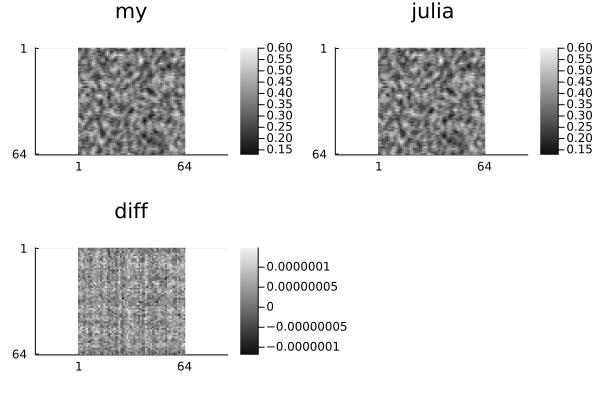

In [4]:
# make plots
imo, imj = imfilter3_vis()
jim(jim(imo, "my"), jim(imj, "julia"), jim(imo - imj, "diff"), gui=true)
# savefig("imfilter3.pdf")